In [1]:
# import statements

import pandas as pd
import numpy as np
import math
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import Series

from sklearn.model_selection import train_test_split
from random import shuffle

from sklearn.naive_bayes import *
import seaborn as sns
from sklearn import metrics

In [2]:
# Read the Gear2 data
Gear2Files = ['./Gear2/segment2.csv', './Gear2/segment3.csv','./Gear2/segment4.csv',
              './Gear2/segment5.csv','./Gear2/segment6.csv']

X_Gear2=[0] * len(Gear2Files)
Y_Gear2=[0] * len(Gear2Files)
for index,file in enumerate(Gear2Files):
    X_Gear2[index] = pd.read_csv(file);
    Y_Gear2[index] = pd.DataFrame(data= np.full((X_Gear2[index].shape[0],1), 2));
    X_Gear2[index] = X_Gear2[index].assign(Gear=Y_Gear2[index].values);

# Read the Gear3 data
Gear3Files = ['./Gear3/segment1.csv', './Gear3/segment2.csv','./Gear3/segment3.csv',
              './Gear3/segment4.csv','./Gear3/segment5.csv', './Gear3/segment6.csv']

X_Gear3=[0] * len(Gear3Files)
Y_Gear3=[0] * len(Gear3Files)
for index,file in enumerate(Gear3Files):
    X_Gear3[index] = pd.read_csv(file);
    Y_Gear3[index] = pd.DataFrame(data= np.full((X_Gear3[index].shape[0],1), 3));
    X_Gear3[index] = X_Gear3[index].assign(Gear=Y_Gear3[index].values);

# Read the Gear4 data
Gear4Files = ['./Gear4/segment2.csv','./Gear4/segment3.csv','./Gear4/segment4.csv',
              './Gear4/segment5.csv', './Gear4/segment6a.csv','./Gear4/segment6b.csv']

X_Gear4=[0] * len(Gear4Files)
Y_Gear4=[0] * len(Gear4Files)
for index,file in enumerate(Gear4Files):
    X_Gear4[index] = pd.read_csv(file);
    Y_Gear4[index] = pd.DataFrame(data= np.full((X_Gear4[index].shape[0],1), 4));
    X_Gear4[index] = X_Gear4[index].assign(Gear=Y_Gear4[index].values);

# Read the Gear 5 data
Gear5Files = ['./Double/segment1.csv','./Double/segment2.csv','./Double/segment3.csv',
              './Double/segment4.csv', './Double/segment5.csv','./Double/segment7.csv']

X_Gear5=[0] * len(Gear5Files)
Y_Gear5=[0] * len(Gear5Files)
for index,file in enumerate(Gear5Files):
    X_Gear5[index] = pd.read_csv(file);
    Y_Gear5[index] = pd.DataFrame(data= np.full((X_Gear5[index].shape[0],1), 5));
    X_Gear5[index] = X_Gear5[index].assign(Gear=Y_Gear5[index].values);

In [3]:

# # Implement moving average for a window size of 3, and split the segments such that each has 750 time-steps

limit = 750
features = list(X_Gear2[0].columns);
scaledFeatures = [item for item in features if item not in ['t','Gear']]

XGear=[]
for index in range(len(X_Gear2)):
    dataG2 = X_Gear2[index];
    x = dataG2[scaledFeatures];
    rolling = x.rolling(window=3);
    rolling_mean = rolling.mean();
    X_Gear2[index][scaledFeatures] = rolling_mean;
    dataG2 = X_Gear2[index].iloc[3:, :];
    gearRange = math.ceil(len(dataG2)/limit);
    XGear += [dataG2[t*limit:t*limit + limit] for t in range(gearRange)];  
    
for index in range(len(X_Gear3)):
    dataG3 = X_Gear3[index];
    x = dataG3[scaledFeatures];
    rolling = x.rolling(window=3);
    rolling_mean = rolling.mean();
    X_Gear3[index][scaledFeatures] = rolling_mean;
    dataG3 = X_Gear3[index].iloc[3:, :];
    gearRange = math.ceil(len(dataG3)/limit);
    XGear += [dataG3[t*limit:t*limit + limit] for t in range(gearRange)];  
    
for index in range(len(X_Gear4)):
    dataG4 = X_Gear4[index];
    x = dataG4[scaledFeatures];
    rolling = x.rolling(window=3);
    rolling_mean = rolling.mean();
    X_Gear4[index][scaledFeatures] = rolling_mean;
    dataG4 = X_Gear4[index].iloc[3:, :];
    gearRange = math.ceil(len(dataG4)/limit);
    XGear += [dataG4[t*limit:t*limit + limit] for t in range(gearRange)];  
    
    
for index in range(len(X_Gear5)):
    dataG5 = X_Gear5[index];
    x = dataG5[scaledFeatures];
    rolling = x.rolling(window=3);
    rolling_mean = rolling.mean();
    X_Gear5[index][scaledFeatures] = rolling_mean;
    dataG5 = X_Gear5[index].iloc[3:, :];
    gearRange = math.ceil(len(dataG5)/limit);
    XGear += [dataG5[t*limit:t*limit + limit] for t in range(gearRange)];  
    
    
# limit = 750

# XGear=[]
# for index, dataG2 in enumerate(X_Gear2):
#     gearRange = math.ceil(len(dataG2)/limit)
#     XGear += [dataG2[t*limit:t*limit + limit] for t in range(gearRange)]

# for index, dataG3 in enumerate(X_Gear3):
#     gearRange = math.ceil(len(dataG3)/limit)
#     XGear += [dataG3[t*limit:t*limit + limit] for t in range(gearRange)]

# for index, dataG4 in enumerate(X_Gear4):
#     gearRange = math.ceil(len(dataG4)/limit)
#     XGear += [dataG4[t*limit:t*limit + limit] for t in range(gearRange)]
    
# for index, dataG5 in enumerate(X_Gear5):
#     gearRange = math.ceil(len(dataG5)/limit)
#     XGear += [dataG5[t*limit:t*limit + limit] for t in range(gearRange)]
    

In [4]:
X = XGear[:] # Copy words
shuffle(X) 

In [5]:
X = pd.concat(X);

In [6]:
data = pd.DataFrame(X);

data.reset_index(inplace = True, drop = True)
for i in range(len(data)):
    data.loc[i,'t'] = i*0.02

In [7]:
# Normalisation
# Feature normalization
# Normalize Time Series Data
# Source : https://machinelearningmastery.com/normalize-standardize-time-series-data-python/

# Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1.
# useful when your time series data has input values with differing scales.
features = list(data.columns);
scaledFeatures = [item for item in features if item not in ['t','Gear']]

for i in range(len(scaledFeatures)):
    feature = scaledFeatures[i];
    print('Scaling feature : ', scaledFeatures[i])
    values = X[feature].values.reshape(-1,1);
    values = values.astype('float32');
    scaler = MinMaxScaler(feature_range = (0,1));
    scaled_f = scaler.fit_transform(values);
    X[feature] = scaled_f;

Scaling feature :  fL
Scaling feature :  thL
Scaling feature :  w1L
Scaling feature :  w2L
Scaling feature :  w3L
Scaling feature :  a1L
Scaling feature :  a2L
Scaling feature :  a3L
Scaling feature :  fR
Scaling feature :  thR
Scaling feature :  w1R
Scaling feature :  w2R
Scaling feature :  w3R
Scaling feature :  a1R
Scaling feature :  a2R
Scaling feature :  a3R
Scaling feature :  x
Scaling feature :  y
Scaling feature :  v
Scaling feature :  vdir


In [8]:
# Create one-hot Y vectors
features.remove('Gear')
features.remove('x')
features.remove('y')
features.remove('v')
X = data[features]
Y = data['Gear']
# Create one-hot Y vectors
# Y_onehot = pd.get_dummies(Y).values;

In [9]:
X = data[features]
Y = data['Gear']

X = np.array(X)
Y = np.array(Y)

In [10]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2);

Accuracy of Gaussian Naive Bayes classifier on test set: 0.60
[[ 930  143   26    0]
 [ 249 1208   61   20]
 [ 196  234  634   97]
 [ 227  610  202  340]]


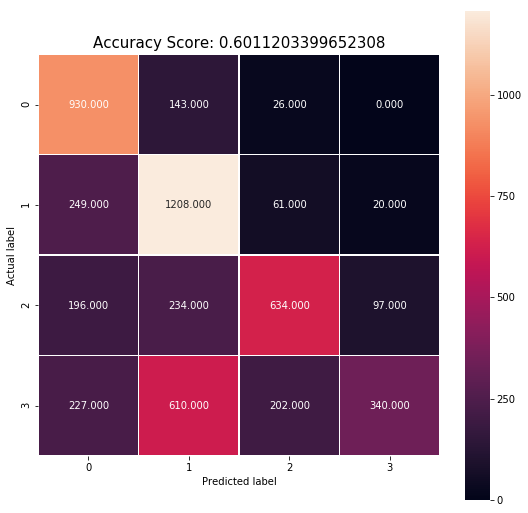

In [11]:
# Naive Bayes Models

# Model 1 : GaussianNB
GaussianNBmodel = GaussianNB() # The likelihood of the features is assumed to be Gaussian:
history = GaussianNBmodel.fit(trainX, trainY)
# Evaluate
predictions = GaussianNBmodel.predict(testX[:,:])
# Score
score = GaussianNBmodel.score(testX, testY)
print('Accuracy of Gaussian Naive Bayes classifier on test set: {:.2f}'.format(score))
# Confusion Matrix
cm = metrics.confusion_matrix(testY, predictions)
print(cm)
# Heatmap
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()

Accuracy of Multinomial Naive Bayes classifier on test set: 0.37
[[682 165 105 147]
 [489 285  98 666]
 [422 243 136 360]
 [125 279 164 811]]


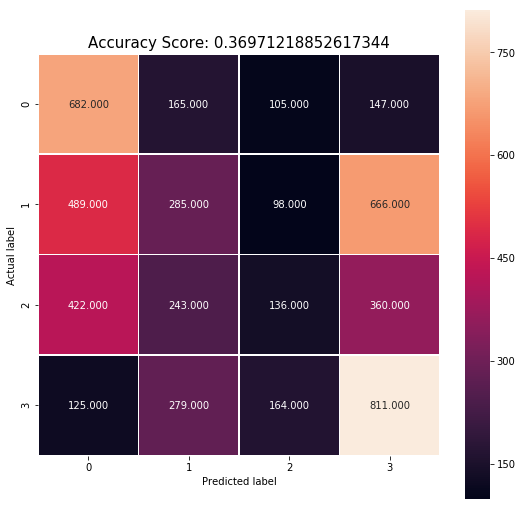

In [12]:
# Model 2 : MultinomialNB
MultinomialNBmodel = MultinomialNB() 
history = MultinomialNBmodel.fit(trainX, trainY)
# Evaluate
predictions = MultinomialNBmodel.predict(testX[:,:])
# Score
score = MultinomialNBmodel.score(testX, testY)
print('Accuracy of Multinomial Naive Bayes classifier on test set: {:.2f}'.format(score))
# Confusion Matrix
cm = metrics.confusion_matrix(testY, predictions)
print(cm)
# Heatmap
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()